# Практика 2. Задача регрессии

Задача (одномерной) линейной регрессии ставится в следующем виде:

$Y_1,Y_2,\dots,Y_n$ - независимые случайные величины.

$$Y_i \sim N(a+bx_i,\sigma^2), i=\overline{1,n}$$

$N(m, \sigma^2)$ - нормальное распределение. Плотность нормального распределения: $f(t)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2\sigma^2}(t-m)^2}$.

Имеются данные $D=\{(x_i,y_i)\}_{i=1}^{n}$, необходимо найти параметры $a$ и $b$, также хотелось бы оценить $\sigma^2$, если это возможно.

Чем отличается $y_i$ от $Y_i$? $(Y_1,\dots,Y_n)$ - набор случайных величин, о распределении которых мы делаем предположение. $(y_1,\dots,y_n)$ - выборка, порождённая случайными величинами. Именно по выборке мы пытаемся оценить свойства случайных величин. В более общем виде эта задача далее будет встречаться постоянно, поскольку является основной задачей машинного обучения. По имеющемуся распределению данных (по выборке) мы будем пытаться обучить модель, которая приближала бы это распределение и хорошо обобщалась на те данные, которых в выборке нет.

Воспользуемся *методом максимального правдоподобия* для получения оценок $a$ и $b$:

$$L=\frac{1}{(\sigma\sqrt{2\pi})^n}\prod_{i=1}^ne^{-\frac{1}{2\sigma^2}(y_i-a-bx_i)^2} \rightarrow \max$$

Внесём произведение в экспоненту:

$$L=\frac{1}{(\sigma\sqrt{2\pi})^n}e^{-\frac{1}{2\sigma^2}\sum_{i=1}^n(y_i-a-bx_i)^2} \rightarrow \max$$

Извлечём из правдоподобия логарифм:

$$\ln L=-n\ln(\sigma)-\frac{n}{2}\ln(2\pi)-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i-a-bx_i)^2 \rightarrow \max$$

Точка максимума функции и точка максимума логарифма функции совпадут. Для нахождения максимума посчитаем частные производные:

$$\frac{\partial \ln L}{\partial a} = \sum_{i=1}^n(y_i-a-bx_i) = 0\Rightarrow a = \frac{1}{n}\sum_{i=1}^{n}(y_i-bx_i)$$

$$\frac{\partial \ln L}{\partial b} = \sum_{i=1}^{n}(y_i-a-bx_i)x_i = 0 \Rightarrow b = \frac{\sum_{i=1}^n(y_i-a)x_i}{\sum_{i=1}^nx_i^2}$$

Далее необходимо решить СЛАУ. Подставим $a$ в формулу $b$:

$$0=\sum_{i=1}^{n}(y_i-a-bx_i)x_i = \sum_{i=1}^{n}(y_i-\frac{1}{n}\sum_{i=1}^{n}(y_i-bx_i)-bx_i)x_i = \sum_{i=1}^{n}(y_i-\overline{y}-b(x_i-\overline{x}))x_i$$

$$\sum_{i=1}^{n}(y_i-\overline{y})x_i=\sum_{i=1}^nb(x_i-\overline{x})x_i$$

$$b = \frac{\sum_{i=1}^{n}(y_i-\overline{y})x_i}{\sum_{i=1}^n(x_i-\overline{x})x_i}$$

Осталось подставить значение $b$ в формулу $a$. Опустим эту выкладку.

Таким образом, мы построили <b>точный аналитический метод</b> нахождения параметров модели, называемый <b>методом наименьших квадратов</b>. Этот метод часто используется для решения задачи регрессии, но важно помнить что он был получен именно из предположения о нормальном распределении данных и основан на максимизации правдоподобия данных.

## Метод наименьших квадратов

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Давайте опробуем полученные формулы.

In [2]:
def generate_samples(function, n_samples, x_min=0, x_max=10, sigma=1):
    """Генерирует одномерные данные с заданной зависимостью"""
    x = np.random.uniform(x_min, x_max, n_samples)
    y = function(x) + np.random.normal(0, sigma, n_samples)
    return x, y

In [3]:
x_min, x_max = 0, 10 #  отрезок, на котором генерируются x
num_samples = 10    # количество точек данных
# генерируем параметры модели
a_true = np.random.normal(0, 3)
b_true = np.random.normal(0, 2)
# генерируем выборку
x, y = generate_samples(lambda x: x*b_true + a_true, num_samples, x_min, x_max, sigma=5)

In [4]:
def show_lin_regr(x, y, x_min, x_max, true_function, function=None):
    """Отображает график линейной регрессии"""
    plt.figure()
    # отрисоваваем точки данных
    plt.scatter(x, y)
    # настоящая кривая
    plt.plot([x_min, x_max], [true_function(x_min), true_function(x_max)], color='green', label="True", lw=3)
    # найденная кривая
    if function:
        plt.plot([x_min, x_max], [function(x_min), function(x_max)], color='red', label="Found")
    # Подписи на рисунке
    plt.gca().legend()
    plt.gca().set_xlim()

Настоящая зависимость и сгенерированные данные:

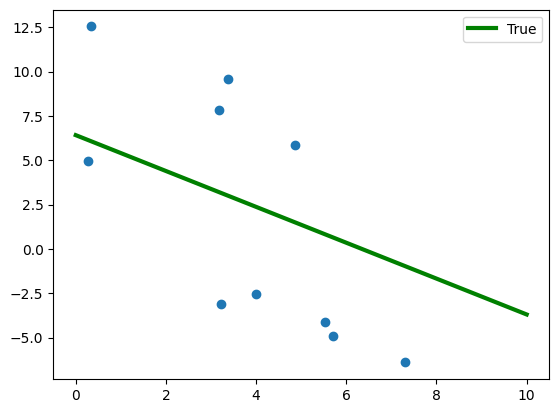

In [5]:
show_lin_regr(x, y, x_min, x_max, lambda x: x*b_true + a_true)
plt.show()

Реализуйте вычисление коэффициентов.

$$b = \frac{\sum_{i=1}^{n}(y_i-\overline{y})x_i}{\sum_{i=1}^n(x_i-\overline{x})x_i}$$

$$a = \frac{1}{n}\sum_{i=1}^{n}(y_i-bx_i)$$

In [6]:
# TODO: Дополните код:
b = 0
a = 0

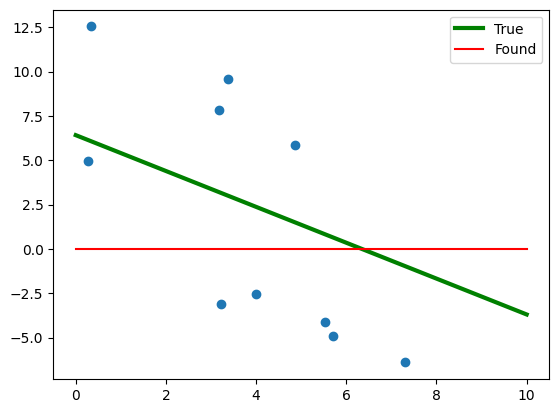

In [7]:
show_lin_regr(x, y, x_min, x_max, lambda x: x*b_true + a_true, lambda x: x*b + a)

## Многомерная линейная регрессия

Пусть теперь $x_i \in \mathbb{R}^d$ - многомерный. Тогда параметр $b$ тоже должен быть многомерным вектором $b\in\mathbb{R}^d$, параметр $a$ всё так же скаляр.

Замечание про размерности матриц:

- $b$ имеет размер $(d,1)$, вектор-столбец
- $X$ имеет размер $(n,d)$, матрица с $n$ строками и $d$ столбцами
- $y$ имеет размер $(n,1)$, вектор-столбец

Теперь данные описываются следующим законом: $Y_i\sim N(a+\langle x_i,b\rangle, \sigma^2)$, где $\langle \alpha, \beta\rangle$ - скалярное произведение.

$\langle x_i,b\rangle$ по другому можно записать через матричное произведение как $b^Tx_i$.

Под $x_i$ будем понимать i-ю строку матрицы $X$. Заметьте, что $x_i$ это хоть и строка, но это вектор-столбец, так всегда принято воспринимать векторы.

В многомерном случае, с параметром $a$ немного сложнее обращаться, поэтому часто для упрощения считают, что каждый вектор $x_i = (x_{i1},x_{i2},\dots,x_{id})$ не $d$-мерный, а $(d+1)$-мерный. Тогда вектор $x_i$ имеет вид $x_i=(1,x_{i1},\dots,x_{id})$.

Далее в рассуждениях, с учётом этого замечания, опустим параметр $a$. 

Запишем логарифм правдоподобия:

$$\ln L=-n\ln(\sigma)-\frac{n}{2}\ln(2\pi)-\sum_{i=1}^{n}\frac{1}{2\sigma^2}(y_i-b^Tx_i)^2 \rightarrow \max$$

Далее вычислим частные производные:

$$\frac{\partial \ln L}{\partial b_j}=\sum_{i=1}^{n}(y_i-x_{ij}b_j)x_{ij}=0, \forall j=\overline{1,n}$$

$$b_j\sum_{i=1}^nx_{ji}x_{ij}=\sum_{i=1}^ny_ix_{ij}$$

Запишем в матричном виде:

$$X^TXb=X^Ty\Rightarrow b=(X^TX)^{-1}X^Ty$$

<details>
<summary><b>Откуда это взялось</b> (кликните)</summary>

Уравнение $\sum_{i=1}^{n}(y_i-b_jx_{ij})x_{ij}=0$ можно записать следубщим образом: $\sum_{i=1}^ny_ix_{ij}=b_j\sum_{i=1}^nx_{ij}x_{ij}$.

 что в свою очередь можно записать через скалярные произведения: $\langle y,x^j\rangle=b_j\langle x^j,x^j\rangle$, где $x^j$ - $j$-й столбец матрицы х, то есть значения $j$-й размеронсти для всех элементов выборки.

Запишем эти уравнения друг под другом:
$$\begin{array}{c}
\sum_{i=1}^ny_ix_{i1}=b_1\sum_{i=1}^nx_{i1}x_{i1}\\
\sum_{i=1}^ny_ix_{i2}=b_2\sum_{i=1}^nx_{i2}x_{i2}\\
\vdots\\
\sum_{i=1}^ny_ix_{id}=b_d\sum_{i=1}^nx_{id}x_{id}
\end{array}$$

Что можно записать в матричном виде:

$$X^Ty=X^TXb$$

И отсюда:
$$X^TXb=X^Ty \Rightarrow b=(X^TX)^{-1}X^Ty$$
</details>

<b>Замечаение</b>

Решение существует только в том случае, если матрица $X^TX$ обратима. Матрица обратима, если её определеитель не равен 0. То есть ранг матрицы совпадает с размерностью данных $rg(X^TX)=d$. В свою очередь $rg(AB)\leq\min\{rg(A),rg(B)\}$, то есть $rg(X^TX)\leq rg(X)$. то есть для получения однозначного решения необходимо не менее d линейно незаваисимых точек.

In [8]:
def generate_samples_dim(function, n_samples, x_min=0, x_max=10, n_dim=1, sigma=1):
    """Генерирует многомерные данные с зыдынной зависимостью"""
    x = np.hstack([np.ones((n_samples,1)), # столбец из единиц
            np.random.uniform(x_min, x_max, (n_samples, n_dim))]) # случайные числа
    y = function(x) + np.random.normal(0, sigma, (n_samples,1))
    return x, y

In [9]:
n_dim = 10
# генерируем параметры модели
b_true = np.random.normal(0, 5, (n_dim + 1, 1)) # b - вектор-столбец
# генерируем выборку
num_samples = 100  # Размер выборки
sigma = 10        # Дисперсия шума
x_min, x_max = 0, 10
x, y = generate_samples_dim(function=lambda x: x @ b_true, n_samples=num_samples, x_min=x_min, x_max=x_max, n_dim=n_dim, sigma=sigma)

Визуализировать многомерные точки довольно тяжело, поэтому просто посмотрим на абсолютные значения.

In [10]:
# TODO: Дополните код:
b = 0

print(f"Истинные коэффициенты:    {b_true.ravel()}")
print(f"Найденные коэффициенты:   {b.ravel()}")
print(f"Отклонение коэффициентов: {np.square(b-b_true).sum()}")

Истинные коэффициенты:    [-3.10558041  5.26479425  7.7337947   3.31182751  0.08433957 -1.81874479
  1.92464864  1.26462697  0.52986509 -4.46920191  4.03140445]


AttributeError: 'int' object has no attribute 'ravel'

## Полиномиальная регрессия

Предположение о том, что исследуемая зависимость в данных линейная, является довольно сильным. Часто зависимость может иметь более сложный вид. Необходимо найти некоторое преобразование данных, после которого можно было бы просто применить линейную регрессию. 

Первым способом получения представления данных, который мы рассмотрим будет полиномиальная регрессия.

Пусть данные можно описать полиномом степени $d$. Данные имеют вид $D=\{(x_i,y_i)\}, x_i,y_i\in\mathbb{R}$. Тогда одномерный вектор $x_i$ можно преобразовать в $(d+1)$-мерный вектор $(1,x_i,x_i^2,\dots,x_i^d)$ и применить к этому вектору многомерную регрессию. Получим модель, описывающую данные следующим образом: $$y_i=\langle (b_1,b_2,\dots,b_{d+1}),(1,x_i,\dots,x_d)\rangle = b_1 + b_2x_i + \dots + b_{d+1}x_i^d.$$

Как мы и хотели, теперь $y_i$ описывается полиномиальной зависимостью от $x_i$. Далее необходимо лишь применить многомерную регрессию.

<b>Замечание</b>

Не обязательно использовать полином для приближения целевой функции. К примеру, если вы можете некоторым образом угадать, что зависимость описывается формулой $y=ax+b\log(x)+c\sin(x)$, то необходимо рассмотреть многомерную регрессию с признаками $(x,\log(x),sin(x))$. Полином лишь является удобным способом, не требующим особых предположений о данных.

Заметьте, что зависимость, включающую сложную функцию мы уже так описать не сможем, к примеру функцию с неизвестным периодом у синуса $y=ax+c\sin(dx)$ мы уже не сможем разложить на сумму её составляющих, в таком случае мы можем только пытаться получить некоторое приближение.

In [11]:
# Реальная зависимость в данных
relation = lambda x: 2 + x + 2 * np.sin(x) # использование numpy-функций позволяет использовать операции с массивами
# генерируем выборку
num_samples = 20    # Размер выборки
sigma = 1          # Дисперсия шума
x_min, x_max = 0, 10
x, y = generate_samples(relation, num_samples, x_min, x_max, sigma)

In [12]:
def draw_polynimial(b=None):
    """Метод для отрисовки полиномиальной регрессии"""
    plt.figure()
    plt.scatter(x,y)
    t = np.linspace(x_min-1, x_max+1, 100)
    plt.plot(t, relation(t), label="True")
    if b is not None:
        tt = np.vstack([np.power(t,i) for i in range(b.shape[0])]).T
        plt.plot(t, tt @ b.reshape(-1,1))
    plt.gca().set_ylim(y.min()-1,y.max()+1)
    

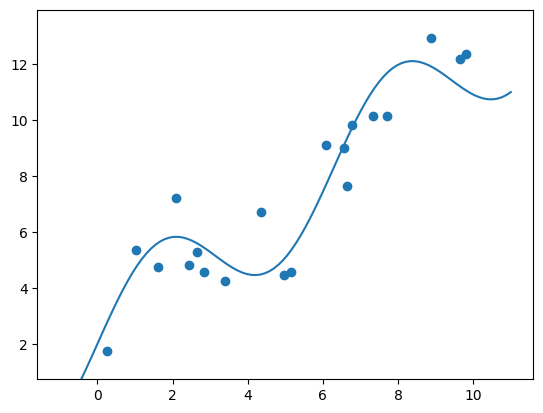

In [13]:
draw_polynimial()

Коэффициенты: [-1.92473582e+00  1.98056715e+01 -2.34994523e+01  1.60206581e+01
 -6.64589538e+00  1.68695794e+00 -2.60717842e-01  2.38696169e-02
 -1.18831422e-03  2.47610049e-05]


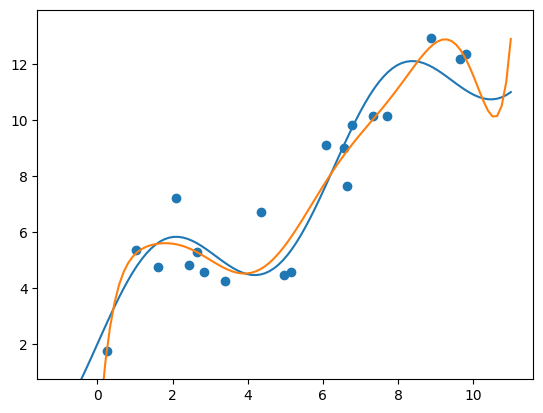

In [14]:
d = 9 # степень полинома
# TODO: Дополните код:
# Создайте вектор X формы (num_samples, d+1)
X = np.vstack([np.power(x, i) for i in range(d+1)]).T
# Вставьте формулу, которую написали выше
b = np.linalg.inv(X.T @ X) @ X.T @ y
draw_polynimial(b)
print(f"Коэффициенты: {b}")

Обратите внимание, что предсказания нашей модели вне границ отрезка, где есть данные, резко уходят в бесконечность. Для интерполяции данная модель подходит хорошо, а вот для экстраполяции её применять никак нельзя. 

На этом примере уже видна одна из проблем Машинного обучения: имеющиеся данные хорошо может описать целое множество совершенно разных моделей (можем менять степень полинома, добавлять разные другие функции), но на новые данные эти модели могут обобщаться очень совсем по-разному. 

Если бы мы угадали, что данные описываются зависимостью $ax+b\sin(x)$ и обучили коэффициенты $a$ и $b$, то такая модель намного более успешно описывала бы данные вне границ отрезка.

## Регрессия "из коробки"

Линейная регрессия очень часто применяется в разных задачах, поэтому каждый раз реализовывать её самим не придётся, есть уже готовые реализации. Поговорим о них. 

`sci-kit learn` это библиотека, в которой популярные модели машинного обучения, библиотека также предоставляет средства для подготовки данных.

In [15]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

Но перед тем, как попробовать готовые методы регрессии, обучимся использовать <b>пайплайны</b>. С помощью пайплайнов можно настраивать последовательность действий, производимых над данными. 

Пайплайны позволяют автоматизировать все шаги обработки данны:
- предобработка пропусков 
- обработка специфичных типов данных
- стандартизация данных
- выделение признаков
- обучение моделей предсказания
- и др.

В библиотеке [ski-kit-learn](https://scikit-learn.org/stable/index.html) есть удобные инструменты для настройки пайплайнов, а также есть готовые реализации моделей машинного обучения.

Для создания своего собственного генератора признаков нам будет необходимо реализовать интерфейс, описанный в библиотеке.

Нам потребуется реализовать интерфейс [TransformerMixin](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html#sklearn.base.TransformerMixin). Он является базовым классом для всех преобразований, доступных в sci-kit-learn.

Необходимо реализовать 3 метода: конструктор, метод fit и метод transform. 

Метод fit должен производить "обучение" преобразования. Метод fit в результате должен вернуть ссылку на объект, то есть заканчиваться метод должен командой `return self`. Необходимо это для построения цепочек вроде `estimator.fit(X_train).transform(X_test)`.

Метод transform должен произвести над данными необходимое преобразование. Возвращать он должен преобразованные данные.

Для данных должно соблюдаться общее правило. Данные всегда должны иметь 2 размерности: (n_samples, n_features), имеющие следующий смысл:

- n_samples - количество точек данных,
- n_features - размерность каждой точки данных.

Такое соглашение соблюдается во всех классах библиотеки sci-kit learn.

### Полиномиальные признаки

Опишем преобразование для извлечения полиномиальных признаков. 

Необходимо произвести следующее преобразование:

$$\begin{pmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{pmatrix} \Rightarrow \begin{pmatrix}
x_1 & x_1^2 & \dots & x_1^d \\
x_2 & x_2^2 & \dots & x_2^d\\
\vdots & \vdots & \ddots & \vdots \\
x_n & x_n^2 & \dots & x_n^d
\end{pmatrix}$$

Обратите внимание, что на входе преобразования будет матрица размера $(n,1)$, а на выходе $(n,d)$.

Важно отметить, что из формулы линейной регрессии $y=Xw+b$ коэффициент $b$ мы исключали лишь для упрощения. В реализациях линейной регрессии в библиотеках наличие коэффициента $b$ настраиваемо. В sklearn за это отвечает параметр `fit_intercept`. Если значение установлено true, то коэффициент b будет обучаться, а иначе он будет иметь фиксированное значение $0$.

In [16]:
class PolynomialFeatures(TransformerMixin, BaseEstimator):
    """ Класс, формирующий полиномиальные признаки. """
    def __init__(self, *, degree:int = 1, bias = False):
        self.degree = degree # степень полинома
        self.bias = bias # включать 0-ю степень?
        
    def fit(self, X, y=None):
        """ Преобразование не зависит от данных. """
        return self
    
    def transform(self, X):
        """ Сформируйте полиномиальные признаки x_i -> (x_i, x_i^2, ... x_i^degree). """
        # TODO: Дополните код:
        X = np.vstack([np.power(x, i) for i in range(d+1)]).T
        # Вставьте формулу, которую написали выше
        b = np.linalg.inv(X.T @ X) @ X.T @ y
        return 0 

Стоит отметить, что мы реализуем "глупый" вариант полиномиальных признаков, поскольку работать такой метод будет только с изначально одномерными данными. 

Взглянем на пример второй размерности, построим полиномиальные признаки 2 степени:

$$\begin{pmatrix}x_1\\x_2\end{pmatrix} \Rightarrow \begin{pmatrix}1\\x_1\\x_2\\x_1x_2\\x_1^2\\x_2^2\end{pmatrix}$$

И тут вскрывается проблема. Для одномерного вектора размерность $1$ переходила в размерность $(d+1)$, a размерность $n$ перейдёт в размерность $C_{n+d}^d$. Важно отметить, что в реальной задаче, где требуется описать сложную зависимость и имеется много признаков, количество полиномиальных признаков будет огромно. Если взять 10 признаков и полином 10 степени, то результатом будут $184756$-мерные векторы.

Одно из решений задачи поиска представления данных это <b>ядерные методы</b>, которые позволяют выделять полиномиальные признаки (и не только их, это зависит от вида ядра) неявно, то есть не вычисляя их напрямую. Представителем ядерных методов является <b>метод опорных векторов</b>, который мы разберём в рамках нашего курса позже.

Другим методом являются нейронные сети, которые строят сложную функцию с помощью композиции простых функций. Важно отметить, что в самом конце нейронных сетей, занимающихся регрессией, всегда стоит знакомая нам линейная регрессия.

Есть и другие методы поиска представления данных, некоторые из которых мы разберём.

In [17]:
# Протестируем преобразование
transformer = PolynomialFeatures(degree=5, bias=False)
X = np.array([[0.5], [1], [2], [3]])
X = transformer.fit_transform(X)
print(X)
# В результате должны быть матрица размером (4, 5)
print(X.shape)

0


AttributeError: 'int' object has no attribute 'shape'

Построим пайплайн для линейной регрессии с полиномиальными признаками.

In [18]:
pipeline = make_pipeline(
    PolynomialFeatures(degree = 9, bias=False),
    LinearRegression(fit_intercept=True)
)

In [19]:
def create_polynomial_pipeline(degree, model):
    """degree - Степень полинома \\
        model - Модель регрессии"""
    return make_pipeline(
            PolynomialFeatures(degree = degree, bias=False),
            model
        )

Давайте опробуем нашу модель.

Сначала создадим данные:

In [20]:
# Устанавливаем семя для повторения эксперимента
np.random.seed(46)
num_samples = 20
x_min, x_max = 0, 10
x = np.random.uniform(x_min, x_max, num_samples)
function = lambda x: x + np.cos(x)
y = function(x) + np.random.normal(0, 1, num_samples)

Регрессия с полиномом 4 степени:

In [21]:
# создание пайплайна 
pipeline_4 = create_polynomial_pipeline(4, LinearRegression(fit_intercept=True))
# обучение модели
pipeline_4.fit(x[:,None], y[:,None]) # заметьте как это теперь просто! не надо ни признаки формировать, ни обучать регрессию

# отображение
x_all = np.linspace(x_min, x_max, 101)
plt.plot(x_all, function(x_all), color = "blue")
plt.plot(x_all, pipeline_4.predict(x_all[:,None]), color="red")
plt.scatter(x, y, marker="*", color = "blue")
plt.ylim(y.min()-1,y.max()+1)

ValueError: Expected 2D array, got scalar array instead:
array=0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Регрессия с полиномом 10 степени:

In [22]:
# создание пайплайна 
pipeline_10 = create_polynomial_pipeline(10, LinearRegression(fit_intercept=True))
# обучение модели
pipeline_10.fit(x[:,None], y[:,None])

# отображение
x_all = np.linspace(x_min, x_max, 101)
plt.plot(x_all, function(x_all), color = "blue")
plt.plot(x_all, pipeline_10.predict(x_all[:,None]), color="red")
plt.scatter(x, y, marker="*", color = "blue")
plt.ylim(y.min()-1,y.max()+1)

ValueError: Expected 2D array, got scalar array instead:
array=0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Мы обучили 2 линейные регрессии с приближением искомой функции полиномами 4 и 10 степени.

Что можно сказать про результаты?

Интуитивно полином 10 степени кажется хуже. Он более склонен описывать не общую закономерность данных, а скорее реагирует на шум, накладываемый на данные. Это отчётливо видно в районе 1 и 9 по координате х. И в целом полученная кривая совсем не похожа на исходную зависимость.

Нам такое поведение не подходит. Но как можно выразить свою неприязнь к такого рода кривым на языке математики? Оказывается, что у "плохих" многочленов значения коэффициентов большие. 

К примеру в рассмотренных выше примерах веса следующие:

In [23]:
print(f"Полином  4 степени: {pipeline_4.steps[1][1].coef_}")
print(f"Полином 10 степени: {pipeline_10.steps[1][1].coef_}")

AttributeError: 'LinearRegression' object has no attribute 'coef_'

Модель регрессии с полиномиальными признаками 10 степени является примером <b>переобученной</b> модели. Переобучение в машинном обучении является важной проблемой. Переобученную модель будет невозможно использовать на новых данных, а ведь именно для этого мы и хотели обучить нашу модель.

# Борьба с переобучением

Из рассмотренных ранее примеров может показаться что проблема переобучения решается просто: не надо обучать полином 10 степени на 10 точках. 

В одномерном случае мы вольны не выбирать большую степень многочлена. Но если входной вектор имеет размерность 200, а линейная регрессия желаемого результата не дала. Следующим шагом было бы извлечение полиномиальных признаков. Но при извлечении признаков всего лишь 2 степени, мы получим $C^{202}_2=\frac{201\cdot202}{2} = 20100$ признаков. Без дополнительной информации мы не можем откинуть какие-то компоненты вектора, а модель уже вполне может переобучиться. 

Так что в многомерном случае переобучение может возникнуть даже для полинома второй степени. 

Также стоит отметить, что метод обнаружения переобучения "на глаз" по анализу графика, как мы делали ранее, также абсолютно не сработает в многомерном случае.

## Тестовая выборка

Самым важным и единственным достоверным методом для обнаружения переобучения является разбиение всей выборки на <b>обучающую</b>(Training set) и <b>тестовую</b>(Test set):

- на <b>обучающей</b> выборке мы обучаем веса модели.
- на <b>тестовой</b> выборке мы проверяем качество обучения модели. Цель состоит в том, чтобы проверить как модель работает на новых данных. 

Обучающая и тестовая выборки обычно формируется разбиением имеющейся совокупности данных на 2 части. При формировании обучающей и тестовой выборок необходимо соблюдать аккуратность. 

Недопустимо смешивать эти выборки между собой. Это разрушит саму идею проверки модели на неизвестных её данных.

Также недопустимо, чтобы разбиение оказалось зависимым от данных. 
- К примеру, если данные изначально отсортированы в некотором порядке, то нельзя просто взять начало данных в одну выборку, а конец взять в другую. Так мы столкнёмся с уже упомянутой проблемой экстраполяции. Поэтому перед разбиением данные необходимо перемешать. 
- Иногда может быть и совершенно противоположная ситуация. К примеру, ваши данные - временной ряд, а задача - по предыдущим значениям временного ряды предсказать следующее значение. Тогда наоборот недопустимо, чтобы в тестовую выборку попали данные из прошлого. Поскольку эти же значения, которые модели необходимо предсказать, окажутся в обучающей выборке в качестве значений, по которым стоится предсказание. Ошибка неочевидная, но сложная модель может воспользоваться такой информацией и тогда оценка качества модели будет некорректной.

Давайте оценим переобучение моделей с помощью разбиения данных на подвыборки.

In [24]:
# Устанавливаем семя для повторения эксперимента
np.random.seed(46)
num_samples = 20
x_min, x_max = 0, 10
x_train = np.random.uniform(x_min, x_max, num_samples)
function = lambda x: x + np.cos(x)
y_train = function(x_train) + np.random.normal(0, 1, num_samples)
# формируем тестовую выборку
x_test = np.random.uniform(x_min, x_max, 500)
y_test = function(x_test) + np.random.normal(0, 1, 500)

# создание пайплайна 
pipeline_4 = create_polynomial_pipeline(4, LinearRegression(fit_intercept=True))
# обучение модели
pipeline_4.fit(x_train[:,None], y_train[:,None])

# создание пайплайна 
pipeline_10 = create_polynomial_pipeline(10, LinearRegression(fit_intercept=True))
# обучение модели
pipeline_10.fit(x_train[:,None], y_train[:,None])

# отображение
x_all = np.linspace(x_min, x_max, 101)
plt.plot(x_all, function(x_all), color = "blue", label="Truth")
plt.plot(x_all, pipeline_4.predict(x_all[:,None]), color="green", label="$P_{4}$")
plt.plot(x_all, pipeline_10.predict(x_all[:,None]), color="red", label="$P_{10}$")
plt.scatter(x_train, y_train, marker="*", color = "blue", label="Training set")
plt.scatter(x_test, y_test, marker="*", color = "orange", label="Test set")
plt.ylim(y_train.min()-1,y_train.max()+1)
plt.legend()

print("На обучающей выборке:")
print(f"Функция ошибки для полинома  4 степени: {mean_squared_error(y_train, pipeline_4.predict(x_train[:,None]))}")
print(f"Функция ошибки для полинома 10 степени: {mean_squared_error(y_train, pipeline_10.predict(x_train[:,None]))}")
print("На тестовой выборке:")
print(f"Функция ошибки для полинома  4 степени: {mean_squared_error(y_test, pipeline_4.predict(x_test[:,None]))}")
print(f"Функция ошибки для полинома 10 степени: {mean_squared_error(y_test, pipeline_10.predict(x_test[:,None]))}")

ValueError: Expected 2D array, got scalar array instead:
array=0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Ошибка моделей на тестовой выборке больше чем на обучающей у обеих моделей, это нормально, но вот ошибка полинома 10 степени всё же отличается на несколько порядков, это явно говорит о сильном переобучении.

Отобразим зависимость ошибки на тестовой и обучающей выборке в зависимости от степени полинома:

In [25]:
# сгенерируем обучающую выборку побольше:
np.random.seed(48)
num_samples = 60
x_min, x_max = 0, 10
x_train = np.random.uniform(x_min, x_max, num_samples)
function = lambda x: x + np.cos(x)
y_train = function(x_train) + np.random.normal(0, 1, num_samples)
# формируем тестовую выборку
x_test = np.random.uniform(x_min, x_max, 500)
y_test = function(x_test) + np.random.normal(0, 1, 500)

err_train = []
err_test = []
deg = 20
for degree in range(1, deg):
    model = create_polynomial_pipeline(degree, LinearRegression(fit_intercept=True))
    model.fit(x_train[:,None], y_train)
    err_train.append(mean_squared_error(y_train, model.predict(x_train[:, None])))
    err_test.append(mean_squared_error(y_test, model.predict(x_test[:, None])))
plt.subplot(121)
plt.plot(range(1, deg), err_train, label="Train loss")
plt.plot(range(1, deg), err_test, label="Test loss")
plt.yscale("log")
plt.legend()

plt.subplot(122)
x_all = np.linspace(x_min, x_max, 101)
plt.plot(x_all, function(x_all), color = "blue", label="Truth")
plt.scatter(x_train, y_train, marker="*", color = "blue", label="Training set", zorder=2)
plt.scatter(x_test, y_test, marker="*", color = "orange", label="Test set")

ValueError: Expected 2D array, got scalar array instead:
array=0.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

На этом графике мы видим, что сначала ошибки на тестовой и обучающей выборках синхронно убывают, потом ошибка на обучающей выборке продолжает убывать, а на тестовой выборке возрастает. Под конец ошибка на обучающей выборке тоже начинает возрастать, что скорее всего вызвано уже арифметическими ошибками, которые возникают из-за слишком больших значений коэффициентов. 

## Регуляризация

Первым методом борьбы с переобучением, а точнее с "симптомом" переобучения, является <b>регуляризация</b>.

Вспомним занятия по теории, а точнее теорему Байеса:

$$p(\theta|D)=\frac{p(D|\theta)p(\theta)}{p(D)}.$$

В предыдущих размышлениях теорема Байеса не применялась. Мы напрямую максимизировали правдоподобие $p(D|\theta)$ и получали оценку максимального правдоподобия параметров.

Теперь же мы воспользуемся теоремой Байеса для того, чтобы выразить свою интуицию о том, что большие значения коэффициентов это плохо. Для этого определим априорное распределение $p(\theta)$ параметров модели. Самым простым и распространённым распределением является нормальное распределение.

Получим, что $p(\theta|D)\propto p(D|\theta)p(\theta)$, отсюда $\ln p(\theta|D)\propto \ln p(D|\theta) + \ln p(\theta) \rightarrow \min\limits_{\theta}$. Часть $\ln p(D|\theta)$ мы уже расписывали, отсюда получается метод наименьших квадратов и минимизация MSE Loss. А часть $\ln p(\theta)$ это логарифм нормального распределения: $$\ln p(\theta) = Const - \sum_i\frac{\theta_i^2}{2\sigma_{\theta}^2} = Const - \frac{1}{2\sigma_{\theta}^2}\sum_i\theta_i^2,$$ где $\sigma_{\theta}$ - предполагаемое среднеквадратичное отклонение весов. 

$\frac{\sigma^2}{\sigma_{\theta}^2}$ обозначают буквой $\alpha$ и называют коэффициентом регуляризации.

Таким образом, функция ошибки примет следующий вид:

$$L(X,y,w)=||Xw-y||^2 + \alpha||w||^2.$$

Такую регуляризацию называют L2 - регуляризацией, потому что используется L2 норма вектора $w$. А метод линейной регрессии, использующий такой метод регуляризации называют <i>Гребневой регрессией</i>.

Есть и вариант, использующий L1 норму, он называется <i>Лассо регрессией</i>.

В sci-kit-learn оба варианта регрессии представлены классами RidgeRegression и LassoRegression

In [ ]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings
# Устанавливаем семя для повторения эксперимента
np.random.seed(46)
num_samples = 20
x_min, x_max = 0, 10
x_train = np.random.uniform(x_min, x_max, num_samples)
function = lambda x: x + np.cos(x)
y_train = function(x_train) + np.random.normal(0, 1, num_samples)
# формируем тестовую выборку
x_test = np.random.uniform(x_min, x_max, num_samples//2)
y_test = function(x_test) + np.random.normal(0, 1, num_samples//2)

models = [(create_polynomial_pipeline(4,  LinearRegression(fit_intercept=True)), "$P_{4}$"),
          (create_polynomial_pipeline(10, LinearRegression(fit_intercept=True)), "$P_{10}$"), 
          (create_polynomial_pipeline(10, Lasso(fit_intercept=True, alpha=0.1)), "Lasso $P_{10}$"),
          (create_polynomial_pipeline(10, Ridge(fit_intercept=True, alpha=0.1)), "Ridge $P_{10}$"),
          (create_polynomial_pipeline(4,  Lasso(fit_intercept=True, alpha=0.1)), "Lasso $P_{4}$"),
          (create_polynomial_pipeline(4,  Ridge(fit_intercept=True, alpha=0.1)), "Ridge $P_{4}$"),]

with ignore_warnings(category=ConvergenceWarning):
    for model, _ in models:
        # обучение модели
        model.fit(x_train[:,None], y_train[:,None])

# отображение
x_all = np.linspace(x_min, x_max, 101)
plt.plot(x_all, function(x_all), color = "blue", label="Truth")
for model, label in models:
    # обучение модели
    plt.plot(x_all, model.predict(x_all[:,None]), label=label)
plt.scatter(x_train, y_train, marker="*", color = "blue", label="Training set")
plt.scatter(x_test, y_test, marker="*", color = "orange", label="Test set")
plt.ylim(y_train.min() - 1, y_train.max() + 1)
plt.legend()

print("Ошибка на тестовой выборке:")
for model, label in models:
    print(f"{label}: {mean_squared_error(y_test, model.predict(x_test[:,None]))}")

Таким образом получается, что полином 10 степени с регуляризацией лучше полинома 4 степени.

In [ ]:
print("Веса моделей:")
for model, label in models:
    print(f"{label}:\n {model.steps[1][1].coef_}")

Для более сложной зависимости в данных оказывается, что и без регуляризации полином десятой степени - лучше. Связано это именно с тем, что полиномом 4 степени описать такую зависимость невозможно. 

Заметьте, что регуляризация не всегда делает лучше. В данном примере L1 регуляризация сделала хуже.

In [ ]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings
# Устанавливаем семя для повторения эксперимента
np.random.seed(46)
num_samples = 40
x_min, x_max = 0, 20
x_train = np.random.uniform(x_min, x_max, num_samples)
function = lambda x: x + np.cos(x)
y_train = function(x_train) + np.random.normal(0, 1, num_samples)
# формируем тестовую выборку
x_test = np.random.uniform(x_min, x_max, num_samples//2)
y_test = function(x_test) + np.random.normal(0, 1, num_samples//2)

models = [(create_polynomial_pipeline(4,  LinearRegression(fit_intercept=True)), "$P_{4}$"),
          (create_polynomial_pipeline(10, LinearRegression(fit_intercept=True)), "$P_{10}$"), 
          (create_polynomial_pipeline(10, Lasso(fit_intercept=True, alpha=0.1)), "Lasso $P_{10}$"),
          (create_polynomial_pipeline(10, Ridge(fit_intercept=True, alpha=0.1)), "Ridge $P_{10}$"),]

with ignore_warnings(category=ConvergenceWarning):
    for model, _ in models:
        # обучение модели
        model.fit(x_train[:,None], y_train[:,None])

# отображение
x_all = np.linspace(x_min, x_max, 101)
plt.plot(x_all, function(x_all), color = "blue", label="Truth")
for model, label in models:
    # обучение модели
    plt.plot(x_all, model.predict(x_all[:,None]), label=label)
plt.scatter(x_train, y_train, marker="*", color = "blue", label="Training set")
plt.scatter(x_test, y_test, marker="*", color = "orange", label="Test set")
plt.ylim(y_train.min() - 1, y_train.max() + 1)
plt.legend()

print("Ошибка на тестовой выборке:")
for model, label in models:
    print(f"{label}: {mean_squared_error(y_test, model.predict(x_test[:,None]))}")

In [ ]:
print("Веса моделей:")
for model, label in models:
    print(f"{label}:\n {model.steps[1][1].coef_}")

А плохое влияние L1 регуляризации как раз можно увидеть в весах модели. Почти все параметры оказались слишком маленькими и слишком близкими к 0. Регуляризация действует слишком сильно, полином 10 степени превратился в полином 4 степени. Необходимо понизить параметр $\alpha$, понизить силу регуляризации.

А если выборка совсем большая, то регуляризация может оказаться и не нужной.

In [ ]:
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils._testing import ignore_warnings
# Устанавливаем семя для повторения эксперимента
np.random.seed(46)
num_samples = 40000
x_min, x_max = 0, 10
x_train = np.random.uniform(x_min, x_max, num_samples)
function = lambda x: x + np.cos(x)
y_train = function(x_train) + np.random.normal(0, 1, num_samples)
# формируем тестовую выборку
x_test = np.random.uniform(x_min, x_max, num_samples//2)
y_test = function(x_test) + np.random.normal(0, 1, num_samples//2)

models = [(create_polynomial_pipeline(4,  LinearRegression(fit_intercept=True)), "$P_{4}$"),
          (create_polynomial_pipeline(10, LinearRegression(fit_intercept=True)), "$P_{10}$"), 
          (create_polynomial_pipeline(10, Lasso(fit_intercept=True, alpha=0.1)), "Lasso $P_{10}$"),
          (create_polynomial_pipeline(10, Ridge(fit_intercept=True, alpha=0.1)), "Ridge $P_{10}$"),]

with ignore_warnings(category=ConvergenceWarning):
    for model, _ in models:
        # обучение модели
        model.fit(x_train[:,None], y_train[:,None])

# отображение
x_all = np.linspace(x_min, x_max, 101)
plt.plot(x_all, function(x_all), color = "blue", label="Truth")
for model, label in models:
    # обучение модели
    plt.plot(x_all, model.predict(x_all[:,None]), label=label)
plt.scatter(x_train, y_train, marker="*", color = "blue", label="Training set")
plt.scatter(x_test, y_test, marker="*", color = "orange", label="Test set")
plt.ylim(y_train.min() - 1, y_train.max() + 1)
plt.legend()

print("Ошибка на тестовой выборке:")
for model, label in models:
    print(f"{label}: {mean_squared_error(y_test, model.predict(x_test[:,None]))}")

Не стоит воспринимать это замечание как гвоздь в крышку гроба регуляризации и проблемы переобучения. Почти всегда в машинном обучении для сбора данных требуется приложить много усилий и, конечно, денег. Поэтому всегда имеющейся выборки оказывается недостаточно: простая модель не может достаточно хорошо описать данные, а сложная модель переобучается. В такие моменты и встаёт острая необходимость борьбы с переобучением.

## Lasso для отбора признаков

Чаще всего в машинном обучении используется именно L2 регуляризация. Как вы видели выше, L1 регуляризация более склонна уменьшать качество обученной модели. Но L1 регуляризация может оказаться полезной в <b>задаче отбора признаков</b>. Веса модели для признаков, которые оказывают наименьшее влияние на результат, получат веса, равные 0.

Объясняется это следующими соображениями:

1. Если в пространстве нарисовать компоненты функции потерь: Среднеквадратичную ошибку и Регуляризацию, то окажется что в точке оптимума линии уровней этих компонент будут касаться. 

<img style="width: 50%; max-width: 960px; display: block; margin: 0 auto;" src="https://yastatic.net/s3/education-portal/media/1_8_bb012dea47_1dd4105626.webp"/>

2. Таким образом, точка оптимума - точка касания эллипса и окружности (в случае L2 регуляризации) и эллипса и "многомерного ромба" (в случае L1 регуляризации). В случае касания эллипса и окружности ничего странного не происходит, а вот если искать точку касания эллипса и ромба, то скорее всего точка касания будет находиться в одной из вершин ромба, где одна из координат равна 0.

<img style="width: 50%; max-width: 960px; display: block; margin: 0 auto;" src="https://yastatic.net/s3/education-portal/media/1_9_c157936d62_f29bca1e43.webp"/>

Таким образом, регрессию с L1 регуляризацией можно применять для того, чтобы найти наименее важные признаки. А после их обнаружения уже надо решить что с ними делать: исключить из модели или как-то преобразовать эти признаки.

Пример L1 регуляризации для отбора признаков:

In [ ]:
w_true = np.array([[10], [20], [0.1]])
# обучающая выборка
num_samples = 1000
x_train = np.random.normal(0, 3, (num_samples, 3))
y_train = x_train @ w_true + np.random.normal(0, 2, (num_samples, 1))
# тестовая выборка
test_samples = 100
x_test = np.random.normal(0, 3, (test_samples, 3))
y_test = x_test @ w_true + np.random.normal(0, 2, (test_samples, 1))
# используемые модели
lin_regr = LinearRegression(fit_intercept=True)
lasso_regr = Lasso(fit_intercept=True, alpha=10)
ridge_regr = Ridge(fit_intercept=True, alpha=10)

lin_regr.fit(x_train, y_train)
lasso_regr.fit(x_test, y_test)
ridge_regr.fit(x_test, y_test)

print(f"Линейная регрессия: {mean_squared_error(y_test, lin_regr.predict(x_test))}")
print(f"   Lasso регрессия: {mean_squared_error(y_test, lasso_regr.predict(x_test))}")
print(f"   Ridge регрессия: {mean_squared_error(y_test, ridge_regr.predict(x_test))}")

print("Обученные веса:")
print(f"Истинные веса:      {w_true.ravel()}")
print(f"Линейная регрессия: {lin_regr.coef_.ravel()}")
print(f"   Lasso регрессия: {lasso_regr.coef_}")
print(f"   Ridge регрессия: {ridge_regr.coef_}")

Как мы видим, L1 регуляризация привела к ухудшению качества модели, но помогла исключить мало значимый параметр. Далее мы можем сами исключить этот параметр и обучить регрессию уже без его учёта.

А теперь взглянем на случай, где один из весов и вовсе нулевой.

In [ ]:
w_true = np.array([[10], [20], [0]])
# обучающая выборка
num_samples = 1000
x_train = np.random.normal(0, 3, (num_samples, 3))
y_train = x_train @ w_true + np.random.normal(0, 2, (num_samples, 1))
# тестовая выборка
test_samples = 100
x_test = np.random.normal(0, 3, (test_samples, 3))
y_test = x_test @ w_true + np.random.normal(0, 2, (test_samples, 1))
# используемые модели
lin_regr = LinearRegression(fit_intercept=True)
lasso_regr = Lasso(fit_intercept=True, alpha=10)
ridge_regr = Ridge(fit_intercept=True, alpha=10)

lin_regr.fit(x_train, y_train)
lasso_regr.fit(x_test, y_test)
ridge_regr.fit(x_test, y_test)

print(f"Линейная регрессия: {mean_squared_error(y_test, lin_regr.predict(x_test))}")
print(f"   Lasso регрессия: {mean_squared_error(y_test, lasso_regr.predict(x_test))}")
print(f"   Ridge регрессия: {mean_squared_error(y_test, ridge_regr.predict(x_test))}")

print("Обученные веса:")
print(f"Истинные веса:      {w_true.ravel()}")
print(f"Линейная регрессия: {lin_regr.coef_.ravel()}")
print(f"   Lasso регрессия: {lasso_regr.coef_}")
print(f"   Ridge регрессия: {ridge_regr.coef_}")

В таком случае оказывается, что L1 регуляризация позволяет выделить признак который и вовсе не влияет на ответ.

Далее рассмотрим пример, когда один из признаков зависит от другого. В нашем примере $x_3=x_2*b+N(0,0.2)$.

In [ ]:
w_true = np.array([[10], [20], [10]])
# обучающая выборка
num_samples = 1000
b = 0.5
x_train = np.random.normal(0, 3, (num_samples, 2))
x_train = np.concatenate([x_train, 
                          x_train[:,1:2] * b + np.random.normal(0, 0.2, (num_samples, 1))], axis = 1)
y_train = x_train @ w_true + np.random.normal(0, 2, (num_samples, 1))
# тестовая выборка
test_samples = 100
x_test = np.random.normal(0, 3, (test_samples, 2))
x_test = np.concatenate([x_test, 
                          x_test[:,1:2] * b + np.random.normal(0, 0.2, (test_samples, 1))], axis = 1)
y_test = x_test @ w_true + np.random.normal(0, 2, (test_samples, 1))
# используемые модели
lin_regr = LinearRegression(fit_intercept=True)
lasso_regr = Lasso(fit_intercept=True, alpha=10)
ridge_regr = Ridge(fit_intercept=True, alpha=10)

lin_regr.fit(x_train, y_train)
lasso_regr.fit(x_test, y_test)
ridge_regr.fit(x_test, y_test)

print(f"Линейная регрессия: {mean_squared_error(y_test, lin_regr.predict(x_test))}")
print(f"   Lasso регрессия: {mean_squared_error(y_test, lasso_regr.predict(x_test))}")
print(f"   Ridge регрессия: {mean_squared_error(y_test, ridge_regr.predict(x_test))}")

print("Обученные веса:")
print(f"Истинные веса:      {w_true.ravel()}")
print(f"Линейная регрессия: {lin_regr.coef_.ravel()}")
print(f"   Lasso регрессия: {lasso_regr.coef_}")
print(f"   Ridge регрессия: {ridge_regr.coef_}")

И снова L1 регуляризация позволяет справиться с зависимыми признаками и исключить их из модели.

## Bridge-регрессия

Использование $L_1$ и $L_2$ норм для регуляризации можно обобщить на использование $L_b$ нормы, то есть к функции ошибки можно добавить следующее:

$$||w||^b=\frac{1}{d}\sum_{i=1}^{d}w_i^b.$$

Обобщённую регрессию с $L_b$ регуляризацией называют Bridge регрессией.

Если $L_2$ регуляризация уменьшает все веса, а $L_1$ позволяет осуществлять отбор признаков, то $L_b$ регуляризация позволяет:

- при $b<1$ усилить эффект отбора признаков;
- при $1<b<2$ получить что-то между $L_1$ и $L_2$;
- при $2<b$ приблизить регуляризацию к равномерной норме.

<img style="width: 50%; max-width: 960px; display: block; margin: 0 auto;" src="https://i.postimg.cc/13Gyv3SR/bridge-examples.png"/>

Применяется этот тип регуляризации редко. Настолько редко, что в sci-kit learn нет реализации Bridge-регрессии. 

## ElasticNet

А это метод регуляризации, который реализован в sci-kit learn. Основан он на простой идее комбинации $L_1$ и $L_2$. Регуляризационный член функции ошибки выглядит следующим образом:

$$\alpha\rho||w||_1 + \frac{\alpha(1-\rho)}{2}||w||_2$$

То есть теперь параметров регуляризации уже 2: сила регуляризации $\alpha$ и соотношение регуляризаций $\rho$.

Пример единичной окружности с $\rho=[0, 0.25, 0.5, 0.75, 1]$

<img style="width: 30%; max-width: 960px; display: block; margin: 0 auto;" src="https://i.postimg.cc/VLwjD1Jf/elastic-example.png"/>

# Домашнее задание

- В наборе данных `hw_2_polynomial_data.csv` записаны значения функции от трёх аргументов. На функцию наложен нормальный шум. Известно, что функция имеет некоторую полиномиальную зависимость от аргументов. Найдите эту зависимость. Укажите какие комбинации переменных с какими степенями составляют зависимость. Результат аргументируйте.

- Выберите несложную нелинейную зависимость. Пример: $x+sin(x)$, но её мы уже подробно рассматривали на паре, выберите что-нибудь поинтереснее. Сгенерируйте тренировочную выборку из 10 точек и тестовую из 500 точек. Добавьте к получаемым точкам шум. Обучите на имеющихся точках линейную регрессию, лассо-регрессию, гребневую регрессию, примените полиномиальные признаки. Нарисуйте на графиках зависимость ошибки на тестовом множестве от коэффициента регуляризации. Как этот график выглядит? Объясните полученные результаты. Нарисуйте зависимость коэффициентов регрессии от коэффициента регуляризации. Как выглядят эти графики?

- В наборе данных `hw_2_strange_data.csv` содержатся некоторые данные. Обучите на этих данных линейную регрессию. Что с этими данными не так?